# **O'rilley Deep Learning**

In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices------------- 1


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
import pandas as pd

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
X_train[0].shape

(28, 28)

### We have 60000 samples each is a matrix of 28*28 pixels

In [8]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
# enable high-res images in notebook (not in the book's code)
%config InlineBackend.figure_format = 'retina'

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
# create a sample of 24 indexs from in range of X_train (just numbers)
index

array([48914, 31539,  2500,  1398, 41398,  5769, 39856, 31912, 52036,
       52136, 43860, 46132, 22637, 31189,  5236, 29572, 14768, 30332,
       24828, 51475, 41971, 28187, 37609, 17660])

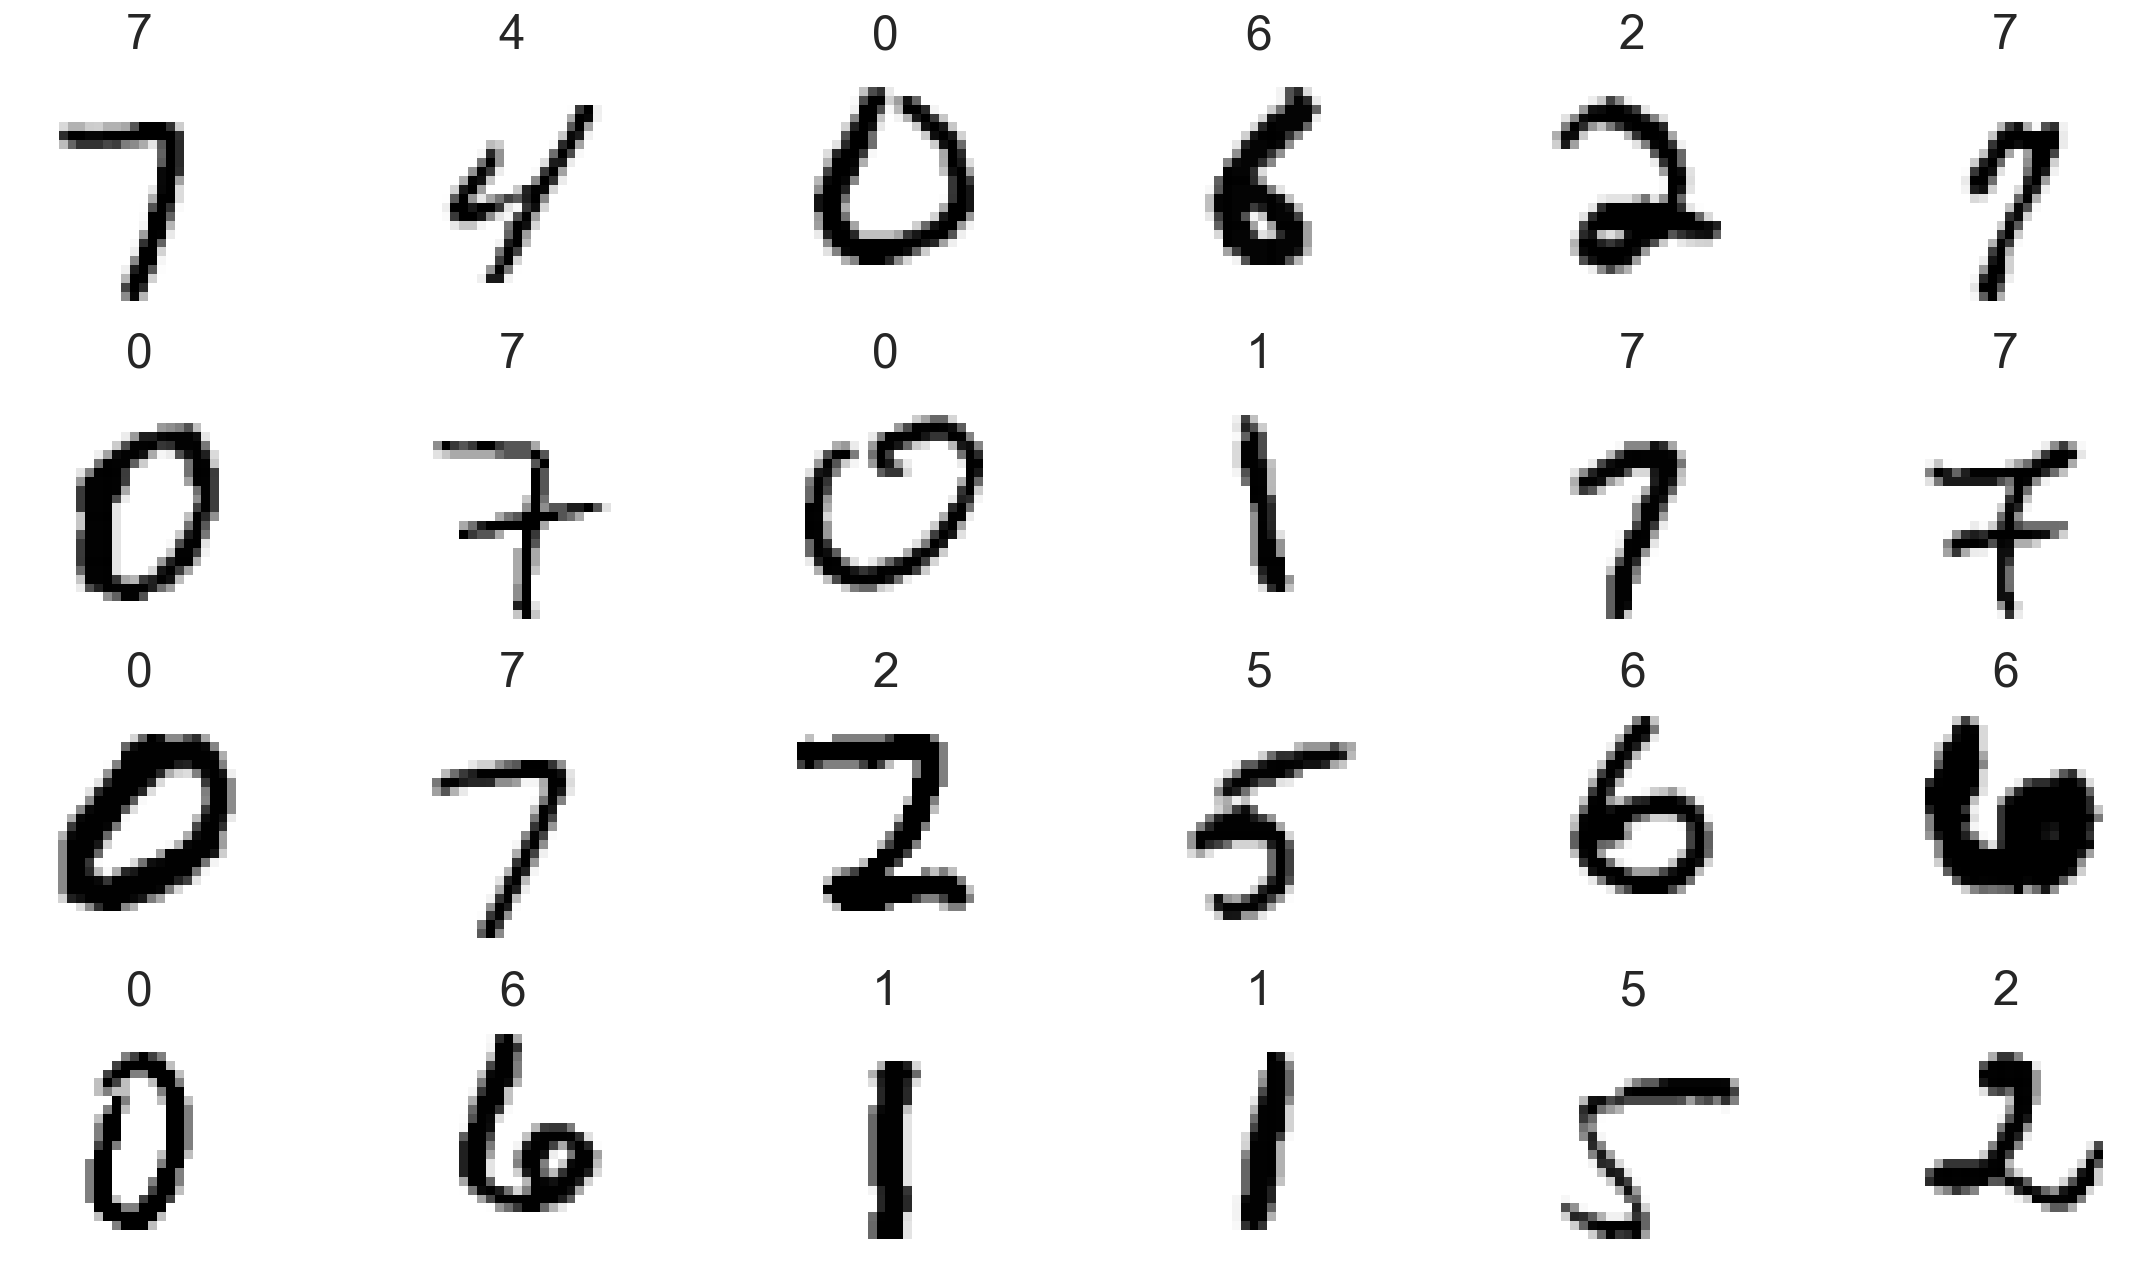

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
#cretaes subplots of 4 by 6
# figure is a shpae of 16 by 9
# axes is an array of 4 by 6 of axes objects

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    #axes.ravel() one dimensional view of 2D array (24 elements)
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

## **Fully Connectet Neural Network** Classifier

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
type(X_train[0])

numpy.ndarray

In [16]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [17]:
import keras

y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)

Using TensorFlow backend.


In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation

dnn = Sequential([ 
              Dense(1024, activation = 'relu', input_shape = (784,)),
              Dense(1024, activation = 'relu'),
              Dense(10, activation = 'softmax')            
])


In [20]:
dnn.compile('Adam', 'categorical_crossentropy', metrics=['accuracy']  )

In [21]:
history_callback = dnn.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1  )

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 91us/step - loss: 0.2057 - accuracy: 0.9373 - val_loss: 0.0927 - val_accuracy: 0.9722
Epoch 2/20
54000/54000 [==============================] - 4s 73us/step - loss: 0.0787 - accuracy: 0.9751 - val_loss: 0.0889 - val_accuracy: 0.9725
Epoch 3/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0761 - val_accuracy: 0.9777
Epoch 4/20
54000/54000 [==============================] - 4s 73us/step - loss: 0.0361 - accuracy: 0.9877 - val_loss: 0.0675 - val_accuracy: 0.9800
Epoch 5/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0757 - val_accuracy: 0.9805
Epoch 6/20
54000/54000 [==============================] - 4s 73us/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0939 - val_accuracy: 0.9785
Epoch 7/20
54000/54000 [==============================] - 4s 74us/ste

In [22]:
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [23]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
#plt.style.use('bmh')

In [24]:
%matplotlib inline

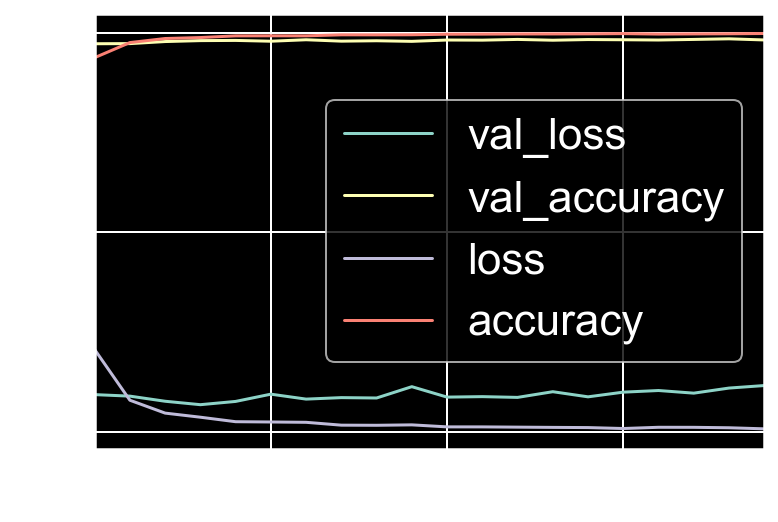

In [25]:
pd.DataFrame(history_callback.history).plot()

Text(0, 0.5, 'loss')

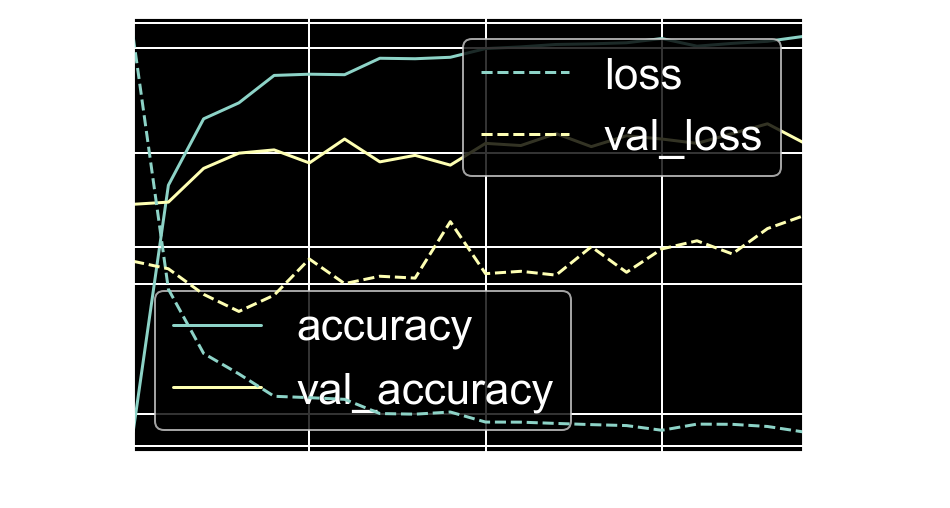

In [28]:
from matplotlib.pylab import figure

df = pd.DataFrame(history_callback.history)

df[['accuracy', 'val_accuracy']].plot(fontsize = 12)
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx()  )
plt.ylabel("loss")
# figure(num=None, figsize=(12, 10), dpi=50)

In [29]:
from keras.layers import Dropout

dnn_dropout = Sequential([
    Dense(1024, input_shape = (784,), activation = 'relu'),
    Dropout (0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [30]:
dnn_dropout.compile('Adam', 'categorical_crossentropy', metrics=[('accuracy')] )

In [31]:
history_dropout  = dnn_dropout.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.3121 - accuracy: 0.9038 - val_loss: 0.1374 - val_accuracy: 0.9575
Epoch 2/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.1479 - accuracy: 0.9544 - val_loss: 0.1042 - val_accuracy: 0.9692
Epoch 3/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.1164 - accuracy: 0.9635 - val_loss: 0.0939 - val_accuracy: 0.9725
Epoch 4/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.0943 - accuracy: 0.9706 - val_loss: 0.0832 - val_accuracy: 0.9753
Epoch 5/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.0824 - accuracy: 0.9741 - val_loss: 0.0791 - val_accuracy: 0.9773
Epoch 6/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.0770 - accuracy: 0.9757 - val_loss: 0.0787 - val_accuracy: 0.9770
Epoch 7/20
48000/48000 [==============================] - 4s 80us/st

In [32]:
dnn_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

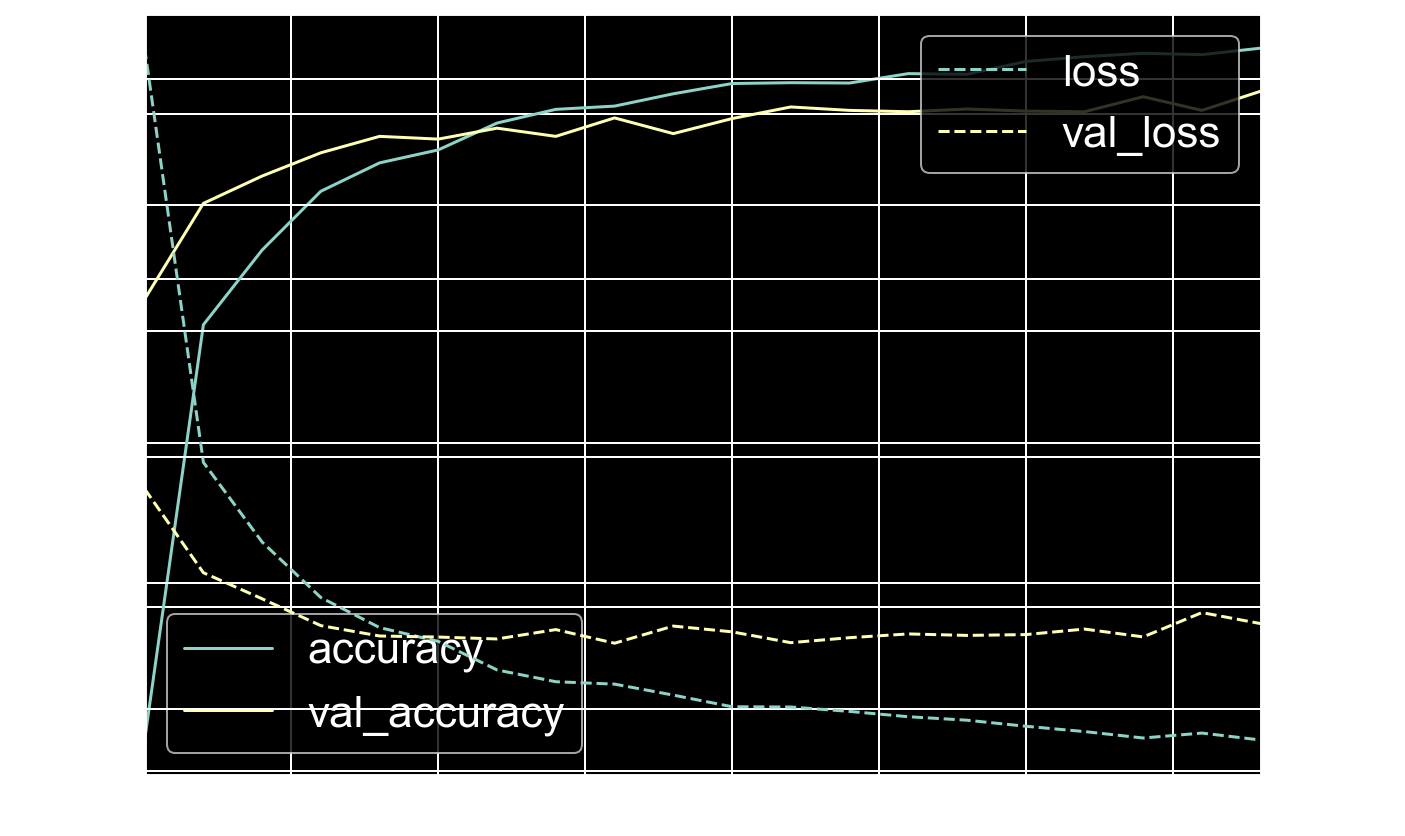

In [33]:
df = pd.DataFrame(history_dropout.history)
df[['accuracy', 'val_accuracy']].plot( fontsize = 15)
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx(), figsize= (10,7), fontsize = 15 )
plt.ylabel("loss")

# **Convolutional Neural Network** Classifier

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## Data Prepration

- X should be of shape (m, 28, 28, 1)
- 1 is for channel, representing the color of the pixel
- We need to reshape X fit the above dimension before feeding it to the model

In [36]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
type(X_train[0])

numpy.ndarray

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

import keras

y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)

In [38]:
y_train[0]

5

In [39]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [40]:
y_test[30]

3

## Normalizing
- All data should be in range 0 to 1
- Value of each pixel is between 0 to 255 so deviding by 255 normalize all pixels

In [41]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

import keras

y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)

## Now we need to convert target column from numeric value to a vector (treated like categorical values)

- A vector of 10 elements (equals to the number of classes in target column) which all elements are 0 and one element is 1 which is corresponding to the predicted value.

- If prediction is numner 3, the 4th element is 1 and others are 0

In [42]:
y_train[0]

5

In [43]:
from tensorflow.keras.utils import to_categorical

y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### The 6th element of above vector is 1 which corresponds to number 5

In [44]:
y_train.shape

(60000, 10)

In [45]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [46]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### The 8th elemnt of above vector is 1 which corresponds to number 7

In [47]:
y_test.shape

(10000, 10)

## Now building the model


In [48]:
from tensorflow.keras.models import Sequential

cnn = Sequential()

In [49]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

## Convolution:

- Look at small portion of an image and analyse pixels on this portion to learn features or patterns

- These areas are called kernels or patches, mostly 3 by 3 kernels

> for 3 by 3 kernel, the size of filter dimension would be 2 less than the input dimension

- Resulting calculations is the output of convolutional layer and input to the subsequent layer

- Stride: slide of one pixel

- Filter is complete pass of moving the kernel riht to left and top to bottom
> number of filters for regular images is commonly 32 or 64

- Feature map is set of received filters

In [50]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.ibb.co/XCmwKHf/conv.jpg")

Demonstrating the convolutional layer of a convolutional neural network. The 3x3 window that passes over our input image is a "feature filter" for the smiley face's left eye (pretend that this feature filter has been learned over thousands of iterations of seeing similar smiley faces). The output of the convolution layer (on the right) is the resulting "feature map" for this feature filter.

Keep in mind that the resulting values (in green) represent the strength of the match of the feature at the particular point in the input image.

Also keep in mind that there would be multiple feature filters passed over the image that would have their own respective feature maps.

### Adding a Conv2D Convolution Layer:

In [51]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

Size after convolutional layer: $26 \times 26\times64$

### Adding a Maxpool layer:
- Prevent overfitting
- Usually size of 2 by 2

In [52]:
Image(url= "https://i.ibb.co/5RF45JJ/maxpool.jpg")

In [53]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

Size after maxpooling layer: $13 \times 13\times64$

### Adding another Convolutional and Maxpool layer:

- 2nd convolutional layer usually doubles the number of filters to learn more features


In [54]:
cnn.add(Conv2D(filters = 128, kernel_size= (3,3), activation= 'relu' ))

Size after second Convolutational layer:  $11 \times 11\times 128$

In [55]:
cnn.add(MaxPooling2D(pool_size = (2,2) ))

Size after second Maxpooling layer: $5 \times 5\times 128$

### Now we need to flatten the result to become vector
-  flatten() needs no parameter

In [56]:
cnn.add(Flatten())

Size after Flatten layer: $1 \times 32000$

### Upto here we tried to learn  various different feautures
### Now we need to connect those feautures together using fully connected `Dense` layer

- We want to narrow down all 32000 features we have learned into 128 

### Adding a Dense Layer to Reduce the Number of Features

In [57]:
cnn.add(Dense( units=128, activation='relu' ))

### Adding Another Dense Layer to Produce the Final Results
- From 128 to 10

- `Softmax` converts the values of 10 neurons into probabilities

- The neuron with highest probability represents the predicted class for that observation


In [58]:
cnn.add(Dense(units=10, activation = 'softmax'))

### Now lets see the architecture:

In [59]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

- None values are there because our model doesn't know in advance that how many tarining samples we're going to provide

- Param columns is the weights the model learns in each step (connecion between neurons)

### Interpreting the summary table:
- for rach convolutional layer: 
>$ param = \text{Number of filetrs} \times ( \text{filter size} \times \text{number of channels in previous layer} + 1) $

- Ech filter 3rd dimension is equal to the number of channels of the object filter is convulted on.

> For example if we have a (28, 28, 3) object, each filter would be (3, 3, 3)

> For example if we have a (32, 32, 64) object, each filter would be (3, 3, 64)

### Visualizing a Model’s Structure

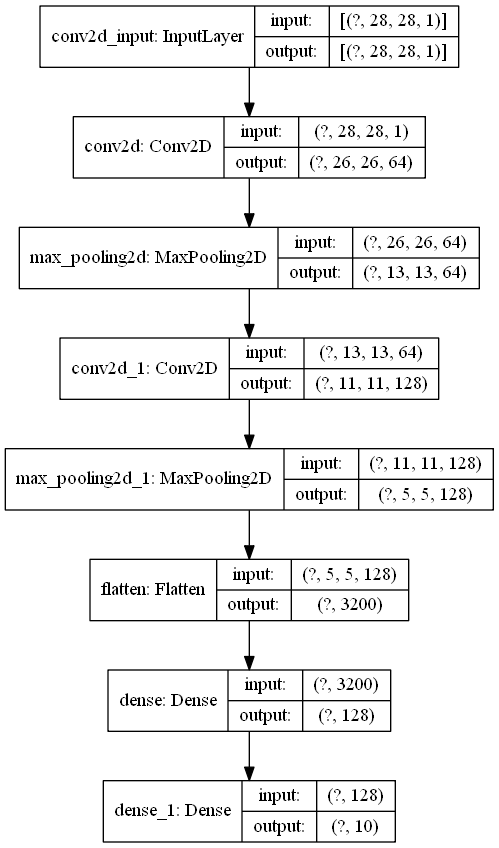

In [60]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)

Image(filename='convnet.png')

### Compiling the Model

In [61]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

### 'adam':
- is the optimizer 

### 'categorical_crossentropy':
 - is our Loss function for multiclass classification
 
### 'accuracy': 
 - gives the percentage of correct predictions

### Training and Evaluating the Model

In [62]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 13s 245us/sample - loss: 0.1399 - accuracy: 0.9581 - val_loss: 0.0680 - val_accuracy: 0.9797
Epoch 2/5
54000/54000 [==============================] - 11s 198us/sample - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0342 - val_accuracy: 0.9898
Epoch 3/5
54000/54000 [==============================] - 11s 195us/sample - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0325 - val_accuracy: 0.9908
Epoch 4/5
54000/54000 [==============================] - 11s 196us/sample - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0327 - val_accuracy: 0.9902
Epoch 5/5
54000/54000 [==============================] - 10s 193us/sample - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0324 - val_accuracy: 0.9903


### validation_data:

- If we have additional data for validation, pass it here as a tuple `(x_val, y_val)`

### Evaluating the Model

In [63]:
loss, accuracy = cnn.evaluate(X_test, y_test)

loss, accuracy

10000/10000 [==============================] - 1s 145us/sample - loss: 0.0289 - accuracy: 0.9907


(0.02890689162472263, 0.9907)

### Making Predictions

### The cell below sows the probability of prediction (`X_test[0]`) belonging to each class

- 99.99% for calss 7

In [64]:
predictions = cnn.predict(X_test)
# Probability of each test observation belonging to each class

for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000012483%
1: 0.0000017730%
2: 0.0000130482%
3: 0.0007759469%
4: 0.0000002720%
5: 0.0000003498%
6: 0.0000000000%
7: 99.9991536140%
8: 0.0000035997%
9: 0.0000572881%


### Let's see what is the actual value for that prediction:

In [65]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Locating the Incorrect Predictions

### 1st we need to reshape the images from `(10000, 28, 28, 1)` to `(10000, 28, 28)`

In [66]:
images = X_test.reshape((10000, 28, 28))

In [67]:
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))


In [68]:
len(incorrect_predictions)

93

### We have 144 incorrect predictions out of 10000 test samples

## Visualizing Incorrect Predictions

In [69]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

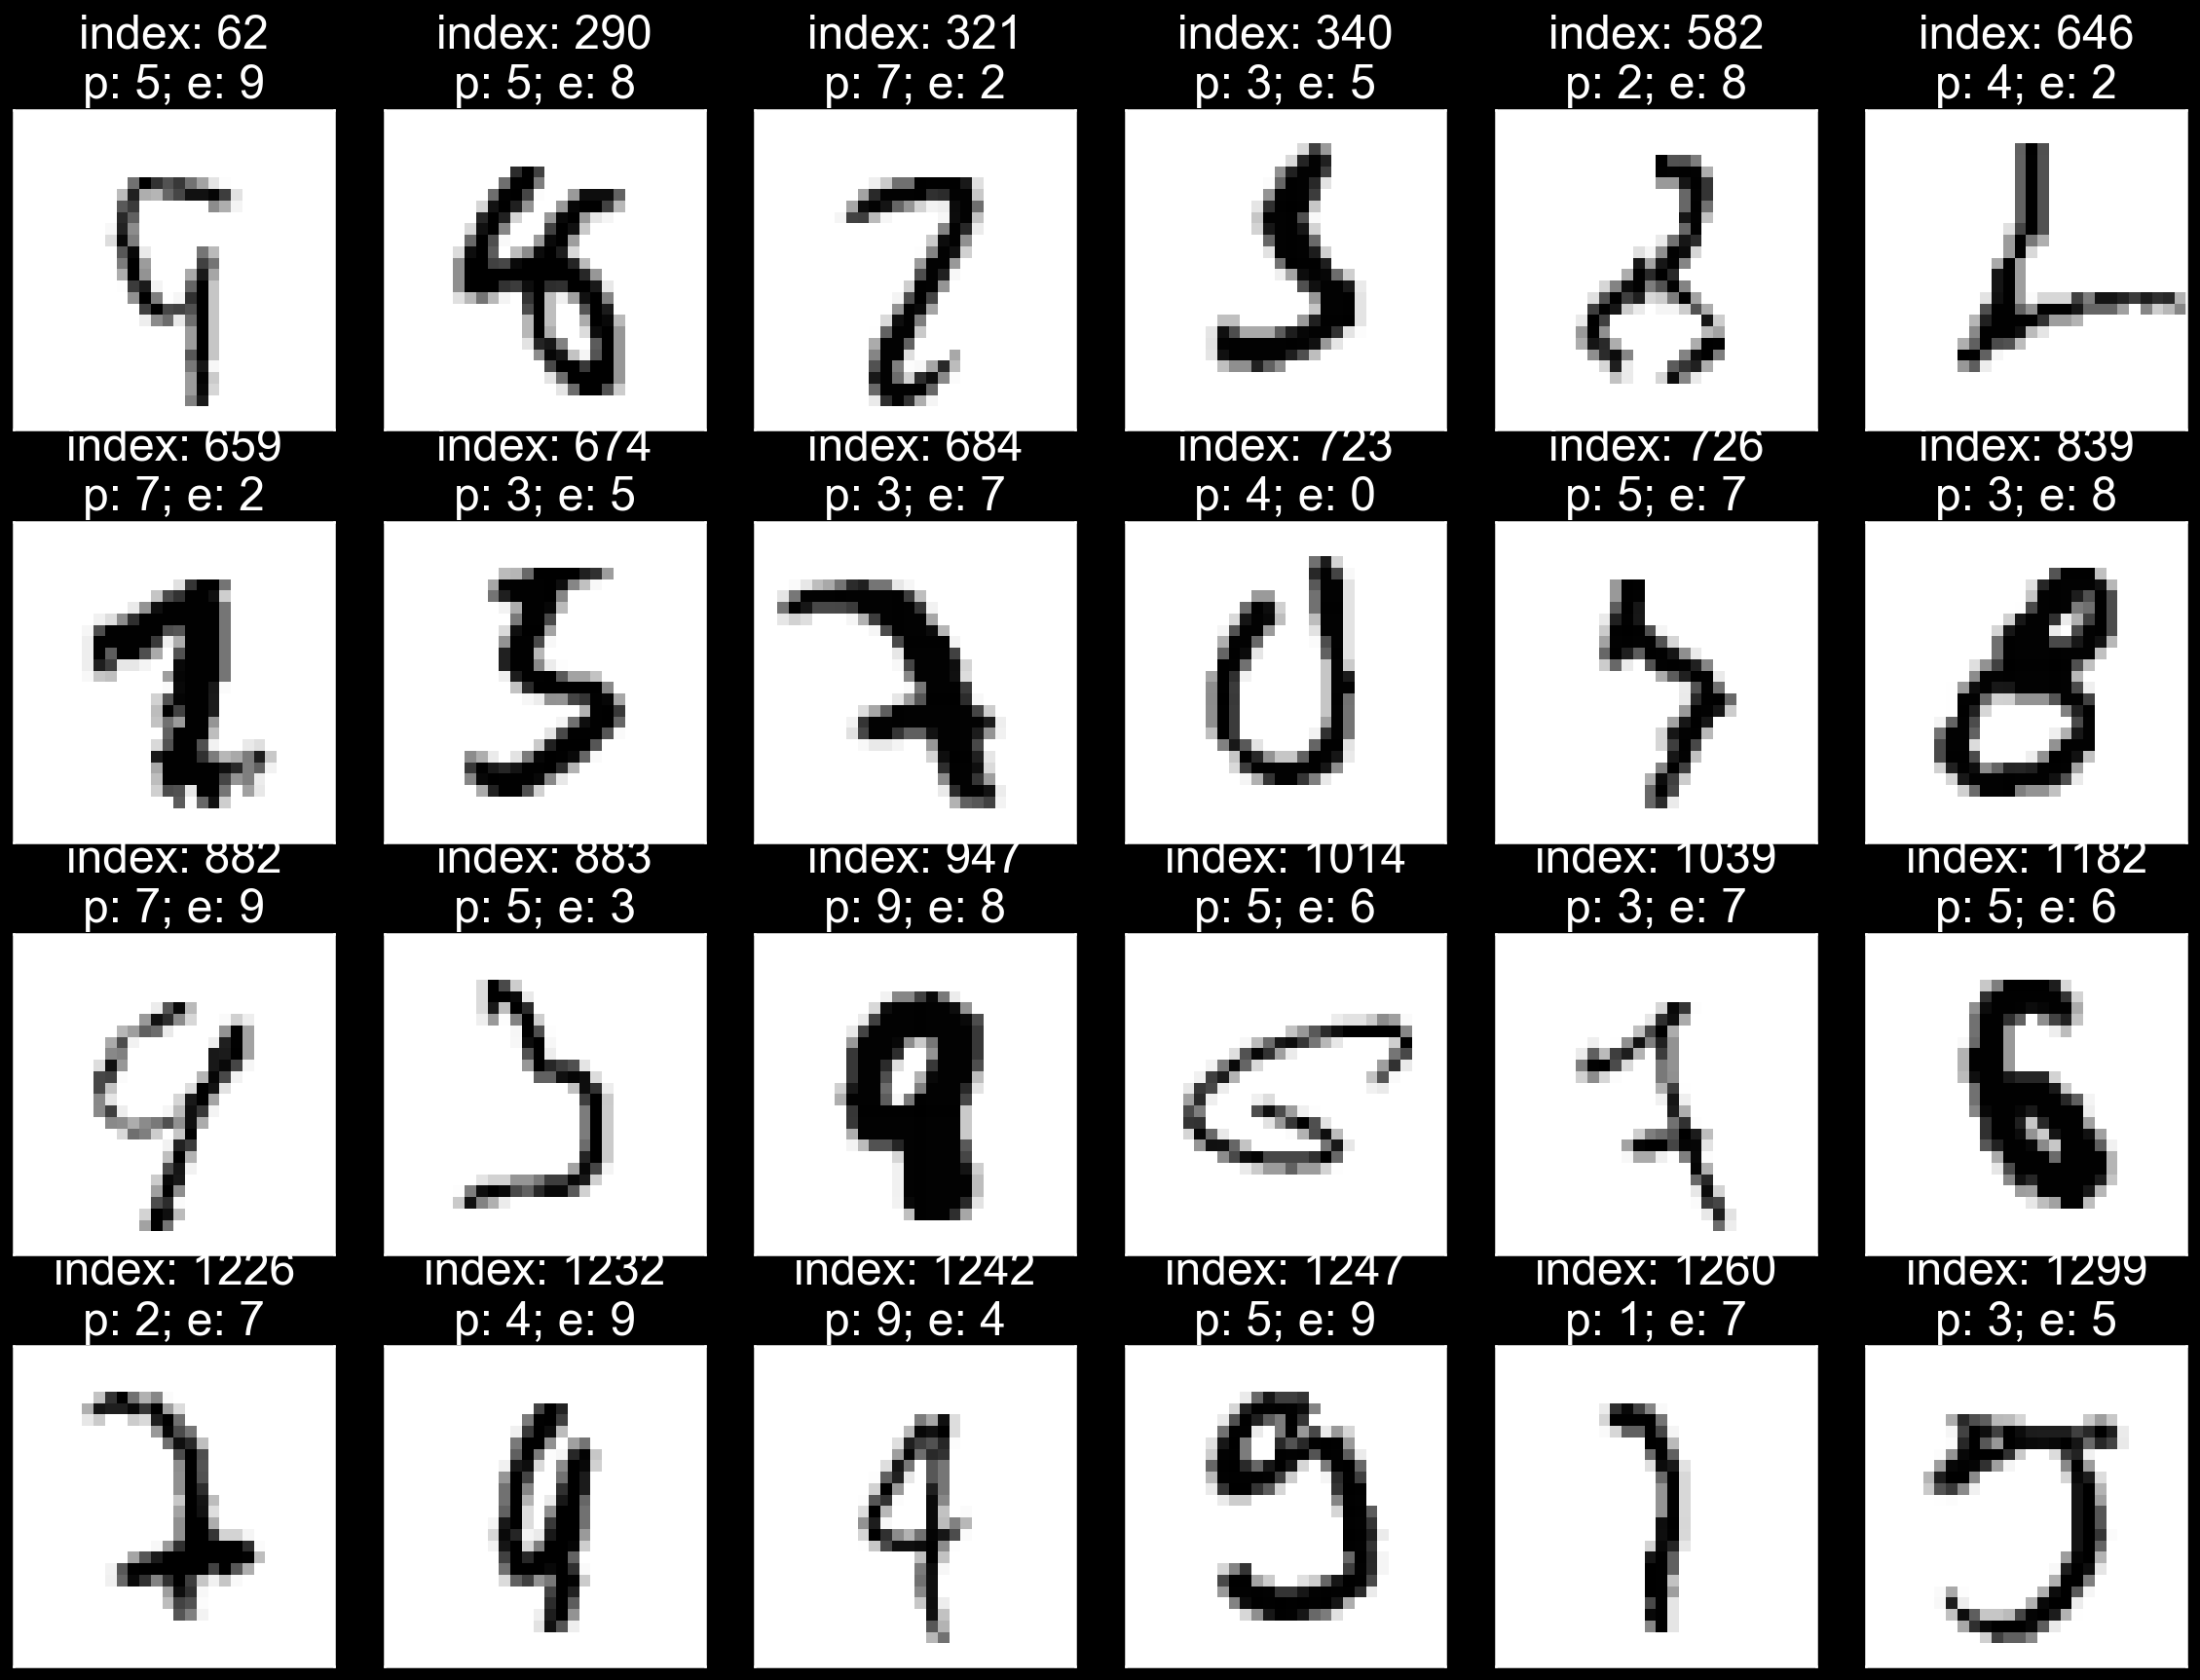

In [70]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

## Displaying the Probabilities for Several Incorrect Predictions

In [71]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [72]:
display_probabilities(predictions[1039])

0: 0.0001060203%
1: 16.9555202127%
2: 8.2657434046%
3: 62.8930211067%
4: 0.4046527669%
5: 0.2328465693%
6: 0.1763125532%
7: 10.3271923959%
8: 0.6184951402%
9: 0.1261011232%


In [73]:
display_probabilities(predictions[726])

0: 0.0001553455%
1: 0.0558780855%
2: 0.0007389516%
3: 0.4617349710%
4: 1.3138377108%
5: 96.8589603901%
6: 0.0041229679%
7: 1.1503964663%
8: 0.0004033565%
9: 0.1537608332%


In [74]:
display_probabilities(predictions[583])

0: 0.0000000123%
1: 0.0000298477%
2: 95.3940808773%
3: 0.0226915203%
4: 0.0000028742%
5: 0.0000000019%
6: 0.0000000019%
7: 4.0854513645%
8: 0.4977492616%
9: 0.0000003779%


## Saving and Loading a Model

In [75]:
cnn.save('mnist_cnn.h5')

In [76]:
from tensorflow.keras.models import load_model

cnn_saved = load_model(r'C:\Users\Behnam\Downloads\Python\Jupyter Notebooks\mnist_cnn.h5')

In [77]:
cnn_saved.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Grid search to find the best parameters

In [78]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [81]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense

def make_model(optimizer="adam", filters=32):
    model = Sequential([
    Convolution2D(filters , kernel_size=(3,3), activation='relu', input_shape =(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Convolution2D(filters , kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10,  activation='softmax')
])

    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [8],  # epochs is fit parameter, not in make_model!
              'filters': [256, 512]}

grid = GridSearchCV(clf, param_grid=param_grid,return_train_score=True)

In [82]:
grid.fit(X_train, y_train)

Epoch 1/8
48000/48000 [==============================] - 36s 743us/step - loss: 0.1175 - accuracy: 0.9636
Epoch 2/8
48000/48000 [==============================] - 33s 683us/step - loss: 0.0413 - accuracy: 0.9873
Epoch 3/8
48000/48000 [==============================] - 33s 682us/step - loss: 0.0293 - accuracy: 0.9911
Epoch 4/8
48000/48000 [==============================] - 34s 701us/step - loss: 0.0197 - accuracy: 0.9934
Epoch 5/8
48000/48000 [==============================] - 33s 689us/step - loss: 0.0158 - accuracy: 0.9949
Epoch 6/8
48000/48000 [==============================] - 33s 690us/step - loss: 0.0100 - accuracy: 0.9966
Epoch 7/8
48000/48000 [==============================] - 33s 683us/step - loss: 0.0112 - accuracy: 0.9961
Epoch 8/8
48000/48000 [==============================] - 12s 257us/step
Epoch 1/8
48000/48000 [==============================] - 33s 697us/step - loss: 0.1194 - accuracy: 0.9630
Epoch 2/8
48000/48000 [==============================] - 33s 694us/step - loss: 

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FF96E46A48>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [8], 'filters': [256, 512]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [83]:
grid.best_params_

{'epochs': 8, 'filters': 256}

In [84]:
grid_score = grid.score(X_test, y_test)
print(f"Test Accuracy after gridsearch for CNN model: {grid_score:.3f}")

10000/10000 [==============================] - 3s 279us/step
Test Accuracy after gridsearch for CNN model: 0.990
